In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql

In [3]:
db = pymysql.connect(user="root",password='#Shanukhan1',database="capstone1")

In [4]:
cur = db.cursor()

In [5]:
query = "SELECT * FROM train_data;"
df = pd.read_sql(query, db)
db.close()

In [6]:
df.shape

(5977, 13)

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.80,5.0,17.74,Audi


In [8]:
df['Mileage']=pd.to_numeric(df['Mileage'])

In [9]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'LandRover', 'Mitsubishi', 'Renault',
       'MercedesBenz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'MiniCooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

###  Data Preprocessing

#### 1) Detect Null Values

In [10]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv_df = pd.DataFrame({'Featrue':nv.index,'Count':nv.values,
                         'Percent':(nv.values/df.shape[0])*100})
nv_df

,Featrue,Count,Percent
0,Mileage,2,0.033462


In [11]:
## Dropping records having null values.
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
Brand                 object
dtype: object

### EDA

In [14]:
cat_cols=['Name','Location','Fuel_Type','Transmission','Owner_Type']
num_cols=['Price','Seats','Power','Engine','Mileage','Kilometers_Driven','Year']

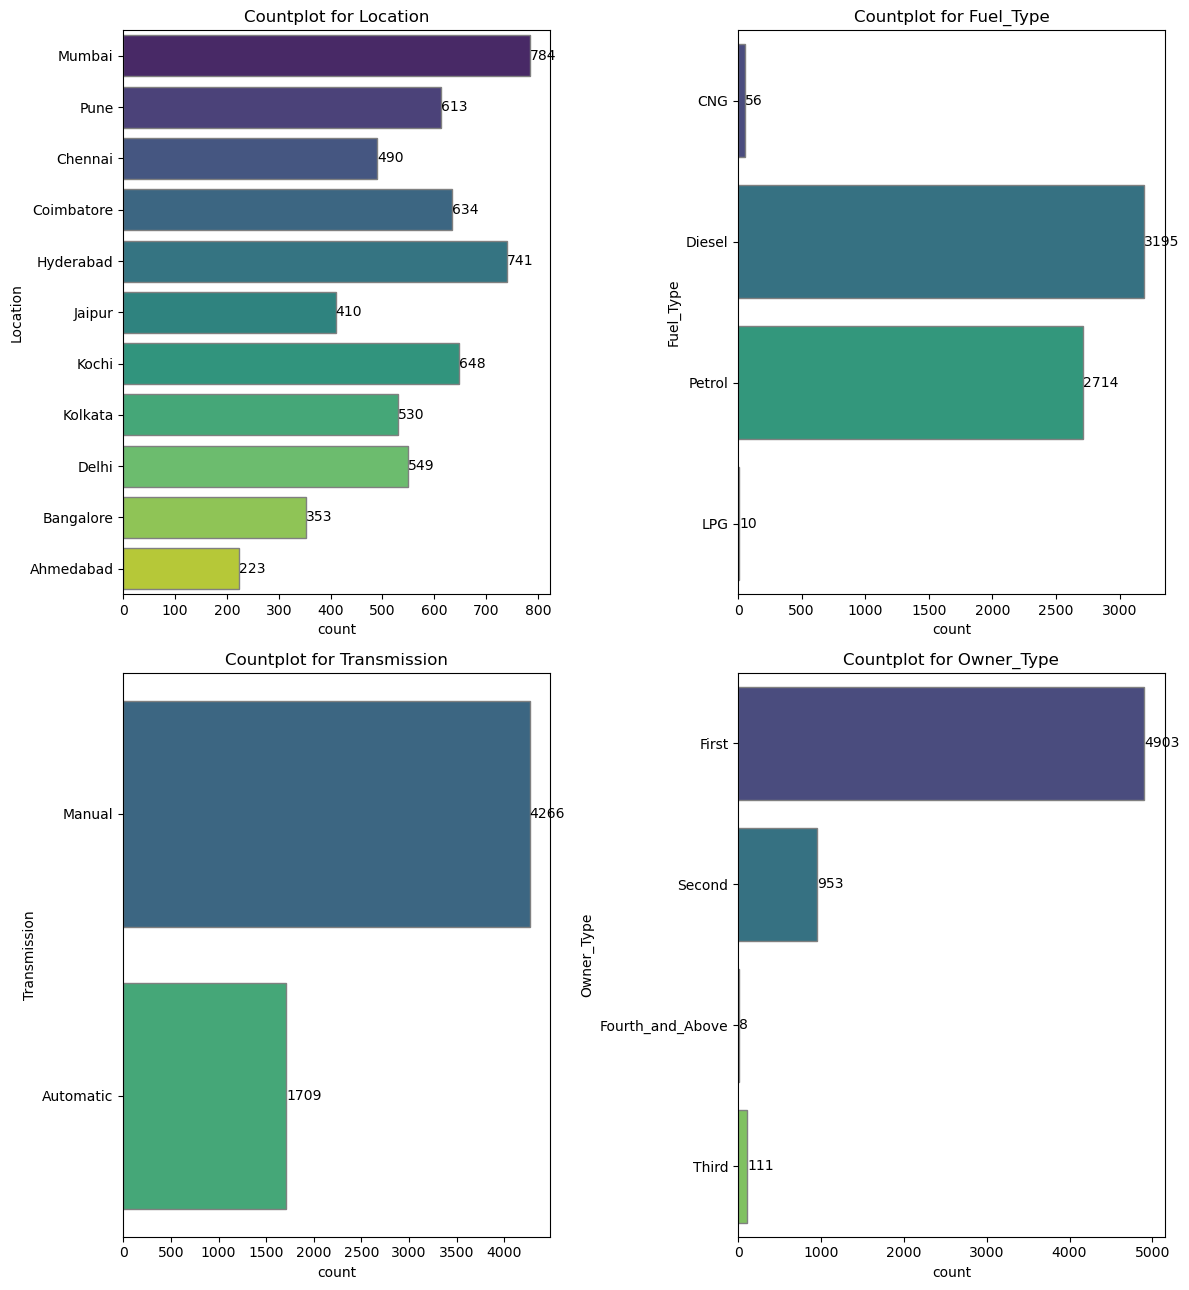

In [15]:
cols=['Location','Fuel_Type','Transmission','Owner_Type']
plt.figure(figsize=(12,13))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(y=df[cols[i]],palette='viridis',edgecolor='gray')
    ax.bar_label(ax.containers[0],label='center')
    plt.title(f'Countplot for {cols[i]}')
    
plt.tight_layout()
plt.show()

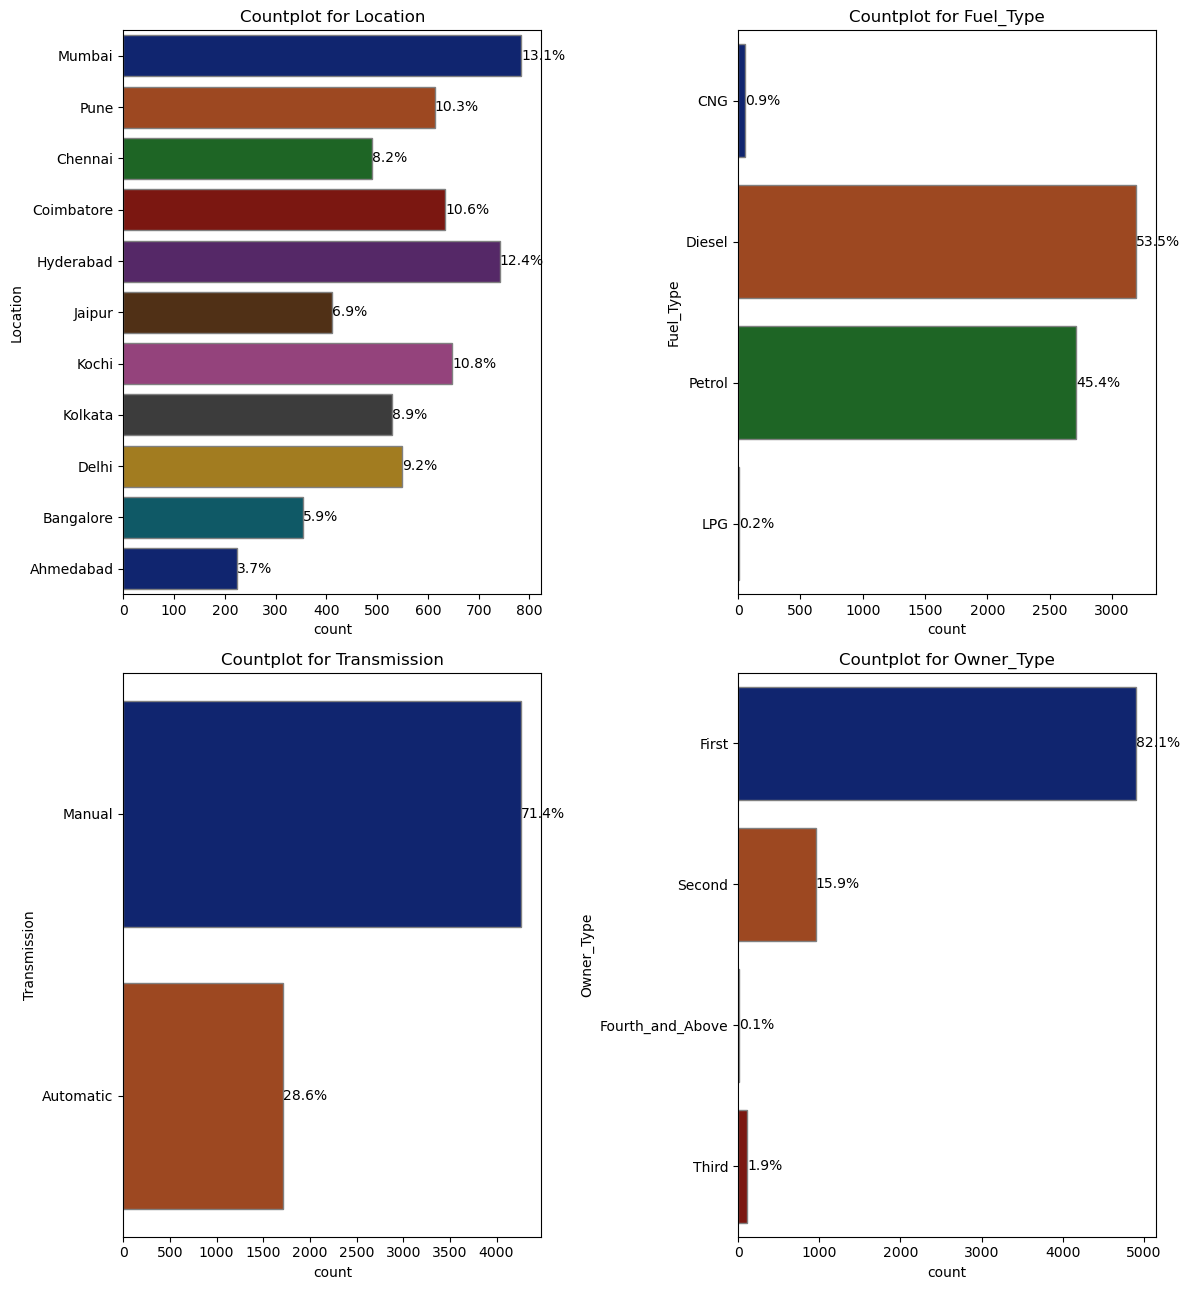

In [16]:
cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
plt.figure(figsize=(12, 13))

total_records = len(df)

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(y=df[cols[i]], palette='dark', edgecolor='gray')
    total_count = len(df[cols[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total_count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center')

    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

<b>Inferences:</b>
    <Pre>
    1. Majority cars are from mumbai, Hyderabad comes at 2nd position after Mumbai.
    2. Deisel and petrol are most common fuel types.
    3. There are more manual transmission cars rather than AMT cars.
    4. Most cars are owned by first owners.
    

In [17]:
import pygwalker as pyg

In [18]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

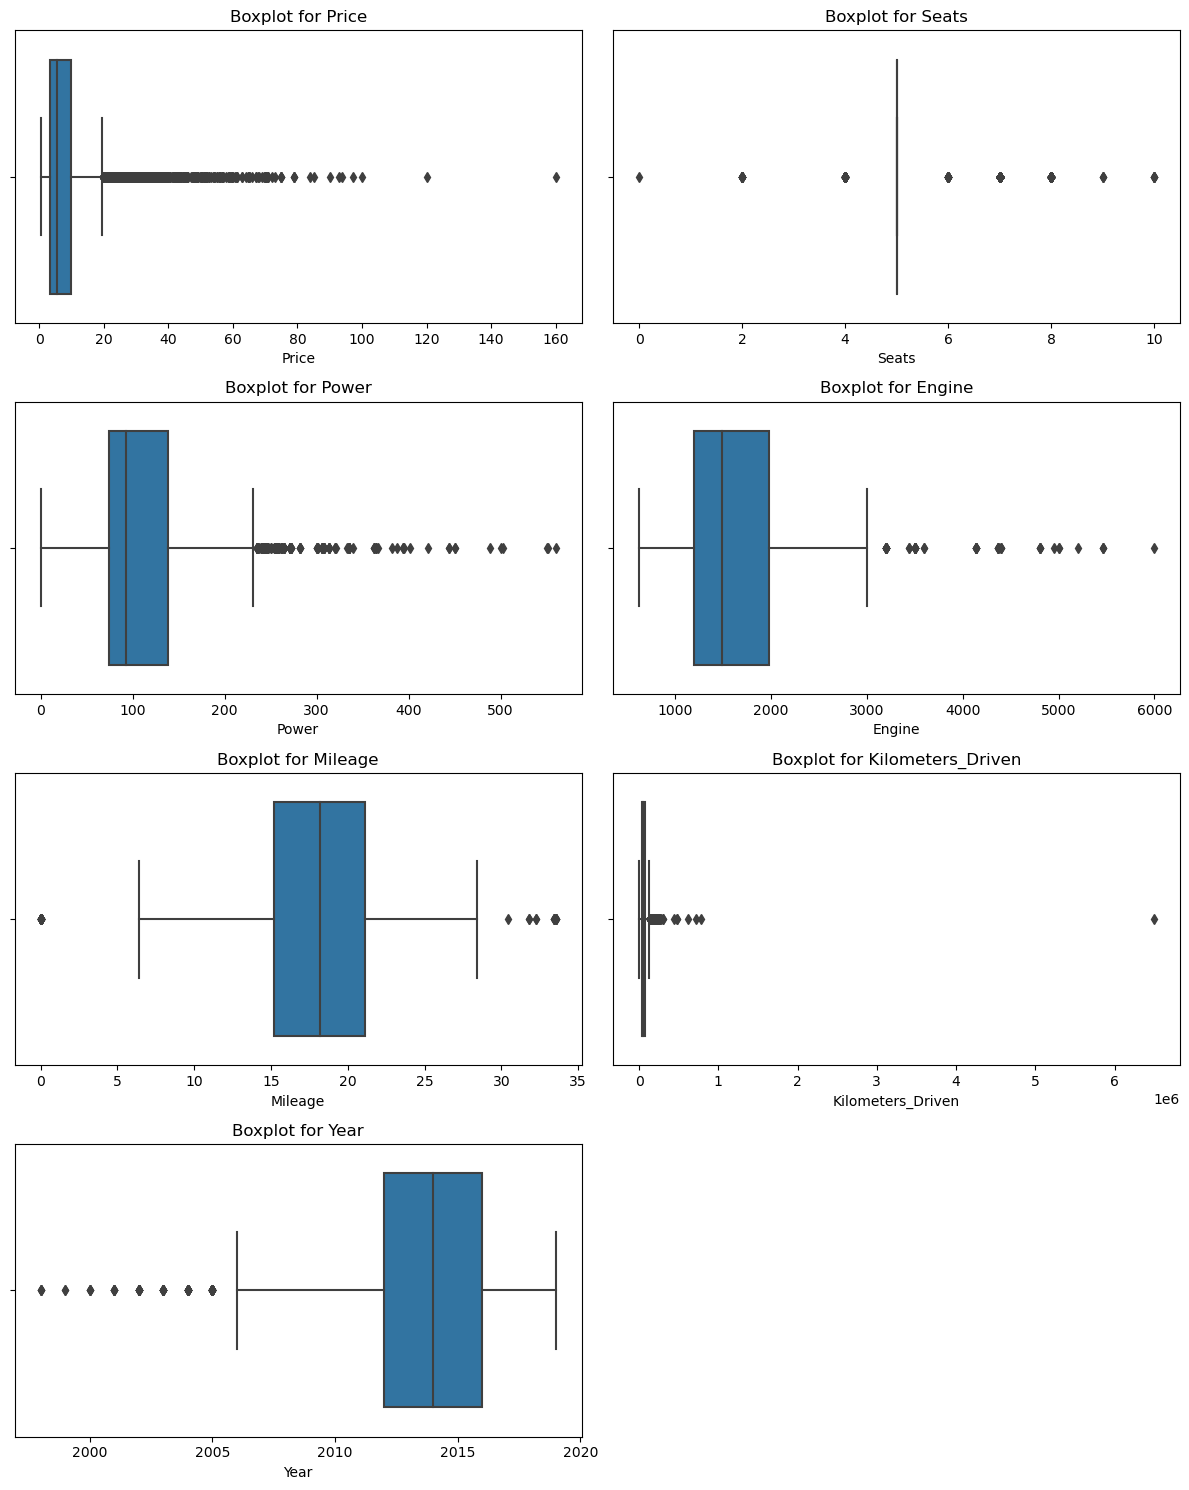

In [78]:
cols=['Price','Seats','Power',
      'Engine','Mileage',
      'Kilometers_Driven','Year']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
    
plt.tight_layout()
plt.show()

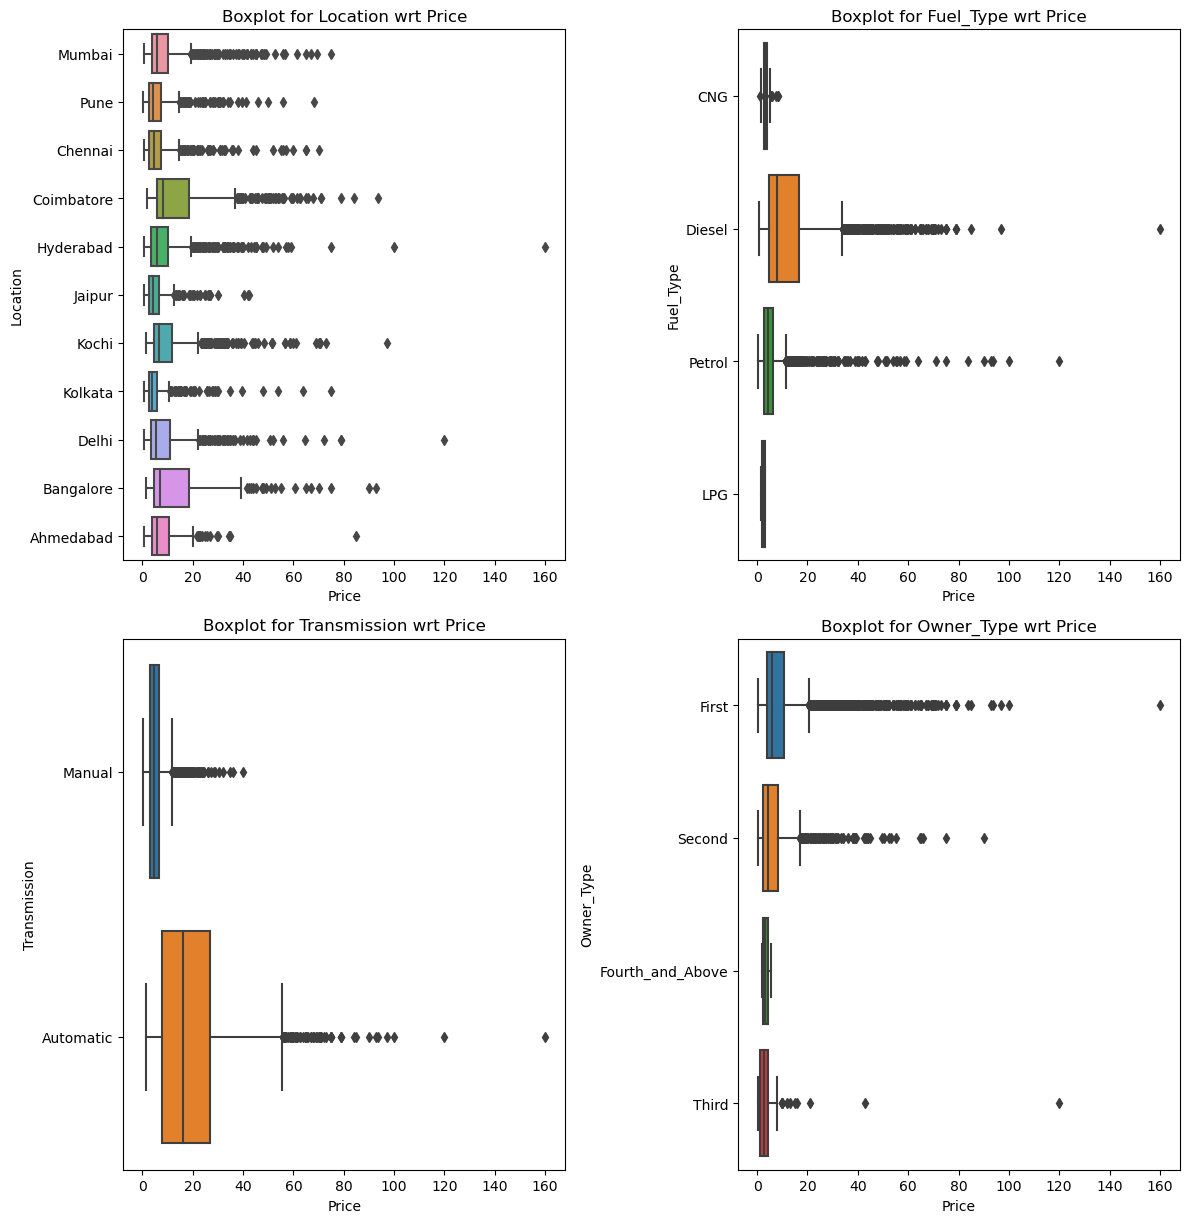

In [79]:
cols=['Location','Fuel_Type','Transmission','Owner_Type']
plt.figure(figsize=(12,18))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df[cols[i]],x = df['Price'])
    plt.title(f'Boxplot for {cols[i]} wrt Price')
plt.tight_layout()
plt.show()

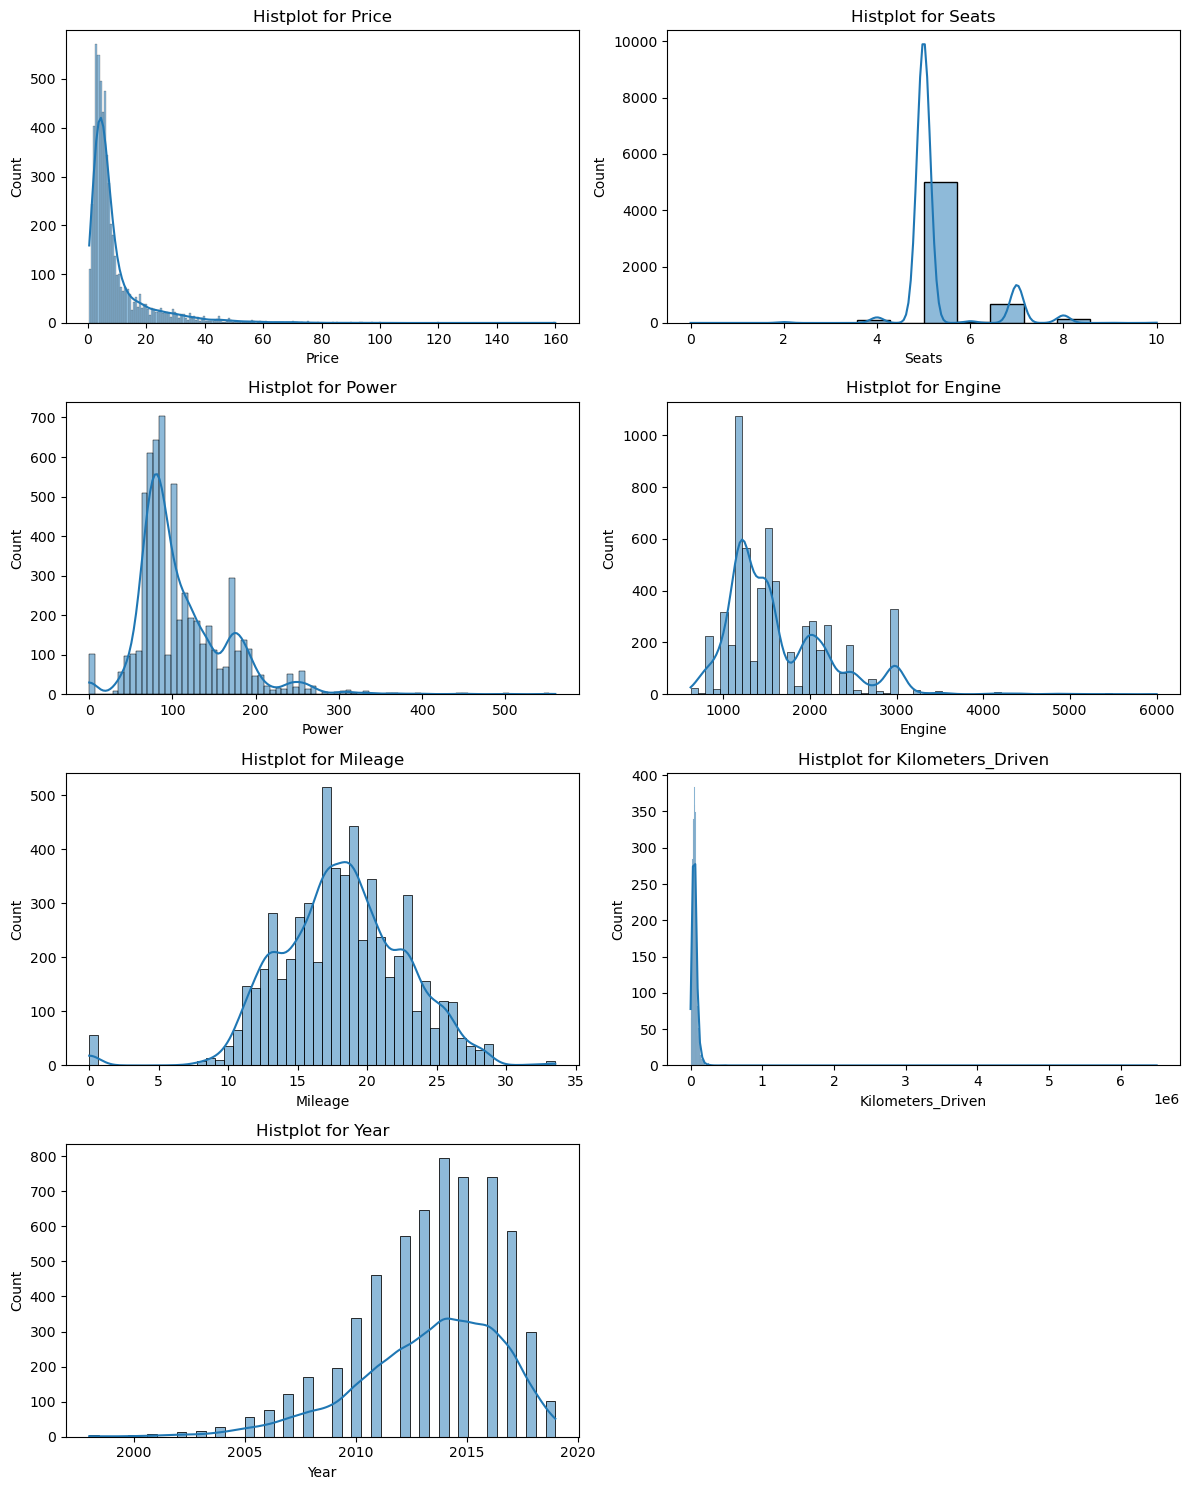

In [80]:
cols=['Price','Seats','Power','Engine','Mileage','Kilometers_Driven','Year']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')
    
plt.tight_layout()
plt.show()

Outliers can be seen in almost every attribute, we'll look at it later

In [81]:
# Creating copy of df

In [82]:
df1 = df.copy()
df2 = df.copy()

In [83]:
from sklearn.preprocessing import *

In [84]:
lb=LabelEncoder()
df['Location'] = lb.fit_transform(df['Location'])
df['Name'] = lb.fit_transform(df['Name'])
df['Brand'] = lb.fit_transform(df['Brand'])

In [85]:
ft = {'Petrol':1,'Diesel':2,'CNG':3,'LPG':4,'Electric':5}
tm = {'Manual':1,'Automatic':2}
ot = {'First':1,'Second':2,'Third':3,'Fourth_and_Above':4}

In [86]:
df['Fuel_Type'] = df['Fuel_Type'].replace(ft)
df['Transmission']=df['Transmission'].replace(tm)
df['Owner_Type']=df['Owner_Type'].replace(ot)

In [87]:
df.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
Brand                  int32
dtype: object

##### Hence there aren'nt any categorical columns now.`

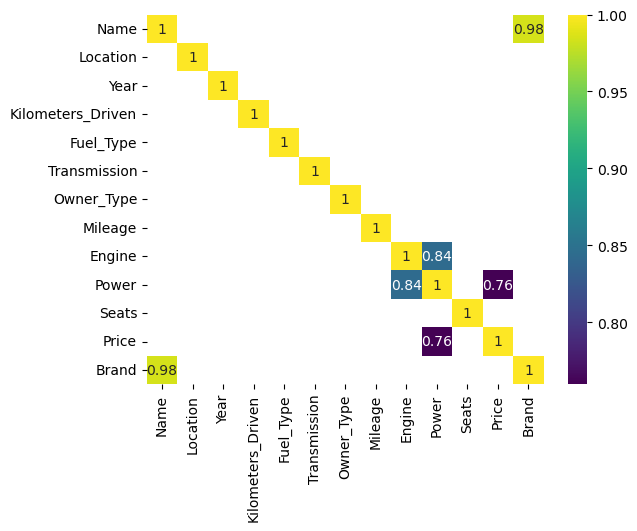

In [88]:
corr = df.corr()
sns.heatmap(abs(corr[corr>0.75]),annot=True,cmap='viridis')
plt.show()

#### inference:
<pre>
1) prices and power of vehicles are highly correlated with each other,
2) power and engine are highly correlated as well.

#### Checking Normality of target variable

In [89]:
from scipy.stats import jarque_bera

In [90]:
print(jarque_bera(df['Price']))
print(jarque_bera(np.log(df['Price'])))

SignificanceResult(statistic=83508.45677582588, pvalue=0.0)
SignificanceResult(statistic=183.86420942366578, pvalue=1.1868455722081112e-40)


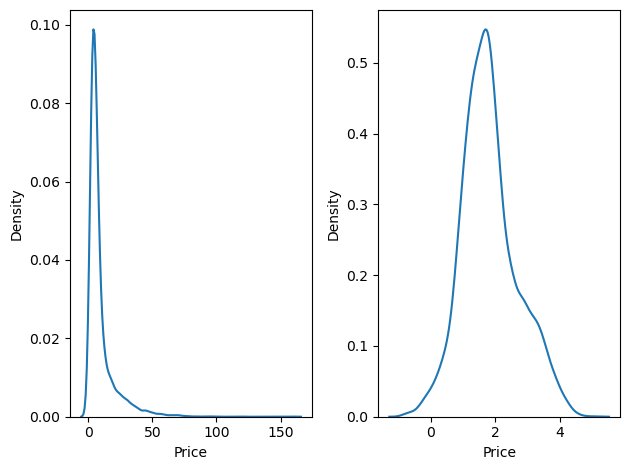

In [91]:
plt.subplot(1,2,1)
sns.kdeplot(df['Price'])
plt.subplot(1,2,2)
sns.kdeplot(np.log(df['Price']))
plt.tight_layout()

we will takke log values of the target variabl in order to get more normality.

### Outliers Treatment

In [92]:
df.describe(percentiles=[0.01,0.02,0.03,0.25,0.75,0.97,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,3%,25%,50%,75%,97%,98%,99%,max
Name,0.00,15.74,33.0000,52.00,465.5,910.00,1298.00,1806.7800,1818.5200,1827.0000,1854.00
Location,0.00,0.00,0.0000,0.00,3.0,5.00,8.00,10.0000,10.0000,10.0000,10.00
Year,1998.00,2004.00,2005.0000,2006.00,2012.0,2014.00,2016.00,2018.0000,2018.0000,2019.0000,2019.00
Kilometers_Driven,171.00,4013.32,7148.0000,9790.02,33908.0,53000.00,73000.00,136608.5600,150000.0000,172297.0000,6500000.00
Fuel_Type,1.00,1.00,1.0000,1.00,1.0,2.00,2.00,2.0000,2.0000,3.0000,4.00
Transmission,1.00,1.00,1.0000,1.00,1.0,1.00,2.00,2.0000,2.0000,2.0000,2.00
Owner_Type,1.00,1.00,1.0000,1.00,1.0,1.00,1.00,2.0000,2.0000,3.0000,4.00
Mileage,0.00,7.94,10.1636,10.91,15.2,18.16,21.10,26.2000,26.9340,28.0900,33.54
Engine,624.00,796.00,796.0000,799.00,1198.0,1493.00,1984.00,2987.0000,2993.0000,3197.2600,5998.00
Power,0.00,0.00,35.0000,46.30,74.0,92.70,138.10,241.4000,258.0000,282.0000,560.00


In [93]:
lower_end=['Kilometers_Driven','Mileage','Engine','Seats','Price','Year']
upper_end=['Kilometers_Driven','Mileage','Engine','Seats','Price','Power']

In [94]:
def ol_treatment_low_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [95]:
df[lower_end] = df[lower_end].apply(ol_treatment_low_end)
df[upper_end] = df[upper_end].apply(ol_treatment_upper_end)

In [96]:
df.describe(percentiles=[0.01,0.02,0.03,0.25,0.75,0.97,0.98,0.99]).T.iloc[:,3:]

,min,1%,2%,3%,25%,50%,75%,97%,98%,99%,max
Name,0.00,15.7400,33.0000,52.00,465.5,910.00,1298.00,1806.7800,1818.5200,1827.000000,1854.0000
Location,0.00,0.0000,0.0000,0.00,3.0,5.00,8.00,10.0000,10.0000,10.000000,10.0000
Year,2004.00,2004.0000,2005.0000,2006.00,2012.0,2014.00,2016.00,2018.0000,2018.0000,2019.000000,2019.0000
Kilometers_Driven,4013.32,4016.7832,7148.0000,9790.02,33908.0,53000.00,73000.00,136608.5600,150000.0000,172114.220000,172297.0000
Fuel_Type,1.00,1.0000,1.0000,1.00,1.0,2.00,2.00,2.0000,2.0000,3.000000,4.0000
Transmission,1.00,1.0000,1.0000,1.00,1.0,1.00,2.00,2.0000,2.0000,2.000000,2.0000
Owner_Type,1.00,1.0000,1.0000,1.00,1.0,1.00,1.00,2.0000,2.0000,3.000000,4.0000
Mileage,7.94,7.9400,10.1636,10.91,15.2,18.16,21.10,26.2000,26.9340,28.090000,28.0900
Engine,796.00,796.0000,796.0000,799.00,1198.0,1493.00,1984.00,2987.0000,2993.0000,3197.067600,3197.2600
Power,0.00,0.0000,35.0000,46.30,74.0,92.70,138.10,241.4000,258.0000,282.000000,282.0000


#### Defining x & y

In [97]:
x = df.drop(['Price','Name'],axis=1)
y = np.log(df['Price'])
print(x.shape)
print(y.shape)

(5975, 11)
(5975,)


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=44)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4182, 11)
(1793, 11)
(4182,)
(1793,)


### OLS Implementation

In [102]:
import statsmodels.api as sm

In [103]:
x1,y1 = x.copy(),y.copy()
x1 = sm.add_constant(x1)
ols_model1 = sm.OLS(y1,x1).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     3777.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:07:23   Log-Likelihood:                -1381.3
No. Observations:                5975   AIC:                             2787.
Df Residuals:                    5963   BIC:                             2867.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -239.9468      3.430    -69.947      0.000    -246.672    -233.222
Location             -0.0204      0.001    -15.092      0.000      -0.023      -0.018
Year                  0.1195      0.002     69.835      0.000       0.116       0.123
Kilometers_Driven -1.303e-06   1.57e-07     -8.287      0.000   -1.61e-06   -9.95e-07
Fuel_Type             0.2356      0.011     22.100      0.000       0.215       0.256
Transmission          0.2960      0.012     24.408      0.000       0.272       0.320
Owner_Type           -0.0590      0.009     -6.214      0.000      -0.078      -0.040
Mileage              -0.0157      0.002     -9.580      0.000      -0.019      -0.013
Engine                0.0004   1.94e-05     19.958      0.000       0.000       0.000
Power                 0.0059      0.000     33.032      0.000       0.006       0.006
Seats                -0.0386      0.007     -5.678      0.000      -0.052      -0.025
Brand                -0.0022      0.001     -3.938      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      758.405   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.163
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       7.804   Cond. No.                     5.69e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference:
    <pre>
    R2 score and adjusted R2 score are similar i.e, 0.87.
    No feature is having P-val greater than 0.5. Means data is not bearing insignificant features.

#### Model Evalulation Function

In [104]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [105]:
from sklearn.metrics import *

In [106]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res

#### 1) Linear Regression

In [107]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
ypred_lr1 = np.exp(lr1.predict(x_test))

In [108]:
lr1_df = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'Lin_Reg1')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.874836,0.873255,110.712898,10.52202,6.661821


#### 2) DT

In [109]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1.fit(x_train,y_train)
ypred_dt1 =np.exp(dt1.predict(x_test))

In [110]:
dt1_df = model_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DTree1')
dt1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree1,0.930509,0.896071,117.877992,10.857163,6.886746


#### 3) RandomForest

In [111]:
rf1 = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=10,
                            min_samples_leaf=15,random_state=1)
rf1.fit(x_train,y_train)
ypred_rf1  = np.exp(rf1.predict(x_test))

In [112]:
rf1_df = model_res(rf1,x_train,x_test,y_train,y_test,ypred_rf1,'RForest1')
rf1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RForest1,0.915351,0.900544,103.096507,10.153645,6.666536


#### 4) KNN Regressor

In [113]:
knn1 = KNeighborsRegressor(n_neighbors=7)
knn1.fit(x_train,y_train)
ypred_knn1  = np.exp(knn1.predict(x_test))

In [114]:
knn1_res = model_res(knn1,x_train,x_test,y_train,y_test,ypred_knn1,'KNN')
knn1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN,0.688444,0.593682,68.676169,8.287109,5.759666


#### 6) AdaBoost Regression

In [115]:
ada1 = AdaBoostRegressor(n_estimators=30)
ada1.fit(x_train,y_train)
ypred_ada1 = np.exp(ada1.predict(x_test))

In [116]:
ada1_df = model_res(ada1,x_train,x_test,y_train,y_test,ypred_ada1,'AdaBoost_Reg')
ada1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.85516,0.841584,58.673946,7.659892,5.565815


#### 7) XGBoost

In [117]:
xgb1 = XGBRegressor(alpha=0.5,gamma=0.8,eta=0.3,max_depth=5)
xgb1.fit(x_train,y_train)
ypred_xgb1 = np.exp(xgb1.predict(x_test))

In [118]:
xgb1_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGboost_Reg')
xgb1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGboost_Reg,0.943023,0.926121,104.352712,10.215318,6.663136


In [141]:
x_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'],
      dtype='object')

In [119]:
ypred_xgb1

array([ 2.157478 ,  6.5929656, 32.628994 , ...,  2.6860232,  3.8623526,
        2.293197 ], dtype=float32)

#### Combined Results

In [120]:
all_res = pd.concat([lr1_df,knn1_res,dt1_df,rf1_df,ada1_df,xgb1_res])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.874836,0.873255,110.712898,10.522020,6.661821
KNN,0.688444,0.593682,68.676169,8.287109,5.759666
DTree1,0.930509,0.896071,117.877992,10.857163,6.886746
RForest1,0.915351,0.900544,103.096507,10.153645,6.666536
AdaBoost_Reg,0.855160,0.841584,58.673946,7.659892,5.565815
XGboost_Reg,0.943023,0.926121,104.352712,10.215318,6.663136


### Hence its clearly visible that xgboost model is the best model with highest test scores and minimum mse and rmse.

### Implementing this model on a test_data file

In [146]:
test = pd.read_csv('test_data.csv')
test.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh


#### Applying same actions on it

In [122]:
test.drop(columns=['Unnamed: 0','New_Price'],inplace=True)

In [123]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [124]:
test['Brand'] = list(map(lambda x: x.split()[0],test['Name']))

In [125]:
ot1 = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}

In [126]:
test['Brand']=np.where(test['Brand']=='Mercedes-Benz','MercedesBenz',test['Brand'])

In [127]:
test['Location'] = lb.fit_transform(test['Location'])
test['Name'] = lb.fit_transform(test['Name'])
test['Brand'] = lb.fit_transform(test['Brand'])
test['Fuel_Type'] = test['Fuel_Type'].replace(ft)
test['Transmission']=test['Transmission'].replace(tm)
test['Owner_Type']=test['Owner_Type'].replace(ot1)

In [128]:
test['Power'] = test['Power'].replace('null', np.nan)

test['Power'] = pd.to_numeric(test['Power'].str.replace(' bhp', ''), errors='coerce')
median_power = test['Power'].median()
test['Power'].fillna(median_power, inplace=True)

In [129]:
test['Engine'] = test['Engine'].str.replace(' CC', '').astype(float)

In [130]:
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

In [131]:
test.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                  int32
dtype: object

In [132]:
test_c=test.copy()

In [133]:
test.drop(columns='Name',inplace=True)

In [145]:
ypred_test = np.round(np.exp(xgb1.predict(test)),2)
ypred_test[:10]

array([ 2.71,  2.71, 14.17,  4.22,  4.11, 11.15, 18.89,  2.62,  3.61,
       12.91], dtype=float32)

In [135]:
submission = pd.DataFrame({'ID':list(range(len(ypred_test))),'Prediction':ypred_test})
submission.sample(15)

,ID,Prediction
924,924,3.855327
812,812,3.232764
91,91,8.991224
204,204,35.763065
958,958,7.613029
371,371,25.276663
144,144,6.000886
684,684,32.353394
772,772,4.140068
979,979,8.869533


In [136]:
submission.shape

(1234, 2)

In [137]:
import pickle

In [138]:
xgbm = pickle.dump(xgb1,open('xgbm.pkl','wb'))

In [139]:
x.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'],
      dtype='object')